Linear Regression with Multiple Variables:
- Implement linear regression using a multivariate dataset (like predicting house prices with features like size, number of rooms, etc.).
- Apply feature scaling (normalization or standardization) to improve the convergence rate of gradient descent.
Experiment with different learning rates and plot how they affect convergence.


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Sample multivariate dataset: [size (1000 sqft), number of rooms]
X = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5]])  # Features: [Size, Rooms]
y = np.array([1.5, 3.0, 4.5, 6.0, 7.5])  # Prices (in $100,000)

In [12]:
# Feature scaling: Standardization
def feature_standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_scaled = (X - mean) / std
    return X_scaled, mean, std

In [13]:
# Function to compute cost
def compute_cost(X, y, w, b):
    m = len(y)
    predictions = X.dot(w) + b
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

In [14]:
# Function to perform gradient descent
def gradient_descent(X, y, w, b, alpha, num_iterations):
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        predictions = X.dot(w) + b
        errors = predictions - y

        # Update weights and bias
        w -= alpha * (1/m) * X.T.dot(errors)
        b -= alpha * (1/m) * np.sum(errors)

        # Store cost for each iteration
        cost = compute_cost(X, y, w, b)
        cost_history.append(cost)

        # Debug: Check the cost every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost}")

    return w, b, cost_history

In [15]:
# Apply feature scaling
X_scaled, X_mean, X_std = feature_standardize(X)

# Initialize parameters (weights and bias)
w = np.zeros(X_scaled.shape[1])  # Initialize weights to zeros
b = 0  # Initialize bias to zero

# Parameters for gradient descent
alpha = 0.01  # Reduce learning rate if needed
num_iterations = 1000  # Number of iterations for gradient descent

# Perform gradient descent to find optimal w and b
w_optimal, b_optimal, cost_history = gradient_descent(X_scaled, y, w, b, alpha, num_iterations)

Iteration 0: Cost = 12.0844125
Iteration 100: Cost = 1.3675547720192232
Iteration 200: Cost = 0.17880098367924613
Iteration 300: Cost = 0.023877896320078758
Iteration 400: Cost = 0.0031977844194857417
Iteration 500: Cost = 0.00042841405004454713
Iteration 600: Cost = 5.739835184496546e-05
Iteration 700: Cost = 7.690205072874217e-06
Iteration 800: Cost = 1.0303310443193944e-06
Iteration 900: Cost = 1.3804341601078182e-07


First 10 cost values: [np.float64(12.0844125), np.float64(11.80136296125), np.float64(11.525631869629123), np.float64(11.257006831891708), np.float64(10.995282324961128), np.float64(10.74025945452911), np.float64(10.491745722604435), np.float64(10.249554803668733), np.float64(10.013506329110463), np.float64(9.783425679620926)]


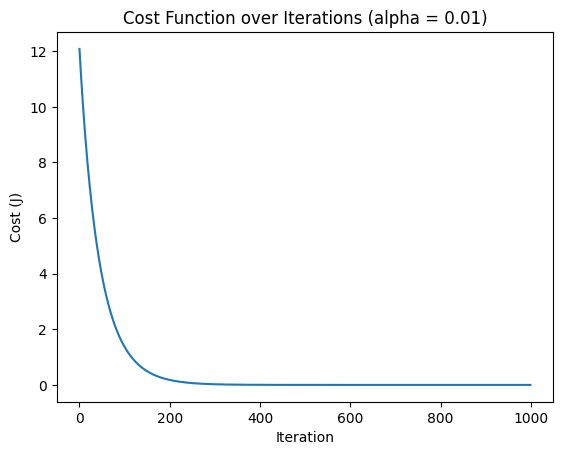

In [16]:
# Debug: Print out the first few costs to verify gradient descent is working
print(f"First 10 cost values: {cost_history[:10]}")

# Check if cost history is populated
if len(cost_history) > 0:
    plt.plot(cost_history)
    plt.title(f"Cost Function over Iterations (alpha = {alpha})")
    plt.xlabel("Iteration")
    plt.ylabel("Cost (J)")
    plt.show()
else:
    print("No cost values to plot.")